In [242]:
import matplotlib.pyplot as plt
%matplotlib widget
import numpy as np
import pandas as pd
from math import sin, cos, atan, radians, degrees, sqrt

In [346]:
# The pacejka magic formula
def pacejkaMF(slip, B, C, D, E):
    '''
    slip = slip ratio (from -100 - 100), or angle (-90 to 90)
    B = define the width of the peak + how sharp it is
    C = define the height of the peak
    D = vertical scale of the shape
    E = how sharp it drops after peak
    '''
    Bx = B * slip
    return D * sin( C * atan( Bx - E * ( Bx - atan(Bx) ) ) )

# make sure it's correct
slip = 10.0 # 10% slip
B = 0.714
C = 1.2
D = 1.0
E = -1.2
p = pacejkaMF(slip, B, C, D, E)
print(f"Pacejka of slip={slip}, B({B}), C({C}), D({D}), E({E}) = {p:.2f}")

Pacejka of slip=10.0, B(0.714), C(1.2), D(1.0), E(-1.2) = 0.97


In [457]:
# let's graph it
pacejkaFV = np.vectorize(pacejkaMF)
slip_range = np.linspace(-100.0, 100.0, num=1000)
W = 4500 # 4500 N

B = 0.89
C = 1.5
D = 1.0
E = -0.1

Flong = pacejkaFV(slip_range, B, C, W, E)
Flong_50 = pacejkaFV(slip_range, B, C, W*0.5, E)
Flong_25 = pacejkaFV(slip_range, B, C, W*0.25, E)
max_Flong = np.max(Flong)

result = np.where(Flong == max_Flong)
optimal_slip = slip_range[result[0]]

# for the lateral
slip_angle_range = np.linspace(-90.0, 90.0, num=1000)

Blat = 0.5
Clat = 1.32
Dlat = 1.0
Elat = 0.4

Flat = pacejkaFV(slip_angle_range, Blat, Clat, W, Elat)
Flat_50 = pacejkaFV(slip_angle_range, Blat, Clat, W*0.5, Elat)
Flat_25 = pacejkaFV(slip_angle_range, Blat, Clat, W*0.25, Elat)
max_Flat = np.max(Flat)

result = np.where(Flat == max_Flat)
optimal_angle = slip_angle_range[result[0]]

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
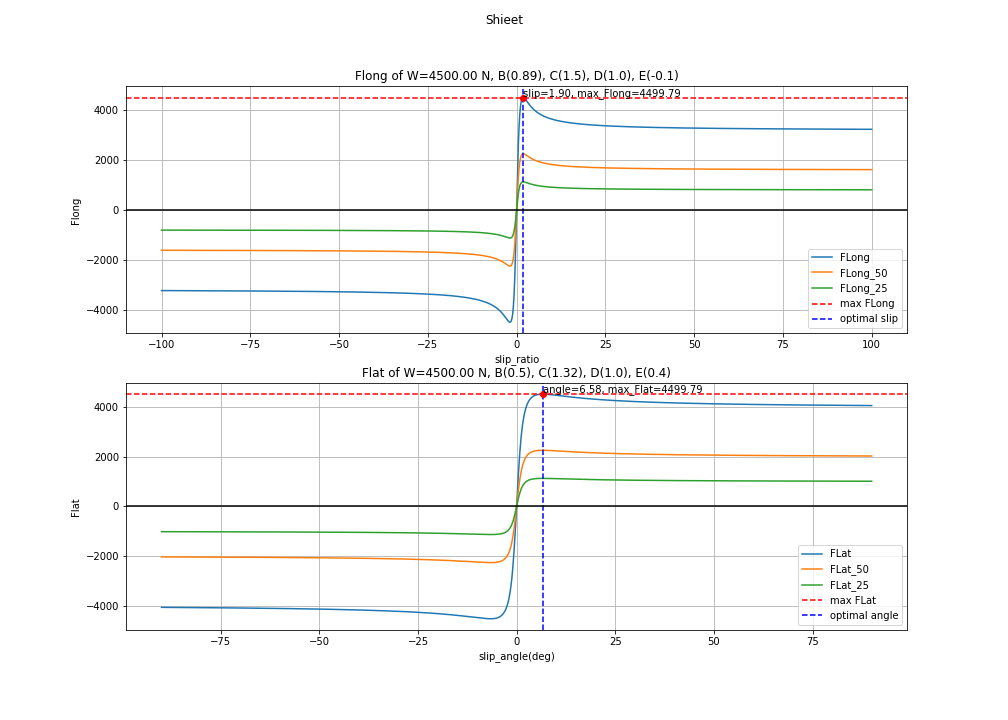

In [458]:
# fig = plt.figure('Pacejka Tire Calculator', figsize=(10, 6))
fig, axs = plt.subplots(2, figsize=(14,10))
fig.suptitle('Shieet')

# plot the function curve
axs[0].plot(slip_range, Flong, label='FLong')
axs[0].plot(slip_range, Flong_50, label='FLong_50')
axs[0].plot(slip_range, Flong_25, label='FLong_25')
# # plot the axis horizontal line for max_Flong
axs[0].axhline(max_Flong, color='r', linestyle='dashed', label='max FLong')
# # plot the vertical line for optimal slip
axs[0].axvline(optimal_slip, color='b', linestyle='dashed', label='optimal slip')

# # draw marker at maxima
axs[0].plot(optimal_slip, max_Flong, 'ro')
axs[0].text(optimal_slip, max_Flong + 64, "slip=%.2f, max_Flong=%.2f" % (optimal_slip, max_Flong) )

axs[0].set_title(f"Flong of W={W:.2f} N, B({B}), C({C}), D({D}), E({E})")
axs[0].set_xlabel('slip_ratio')
axs[0].set_ylabel('Flong')
# # zero axis
axs[0].axhline(0, color='k')
# # plt.axvline(0, color='k')
axs[0].grid()
axs[0].legend(loc='lower right')

# LATERAL VERSION
axs[1].plot(slip_angle_range, Flat, label='FLat')
axs[1].plot(slip_angle_range, Flat_50, label='FLat_50')
axs[1].plot(slip_angle_range, Flat_25, label='FLat_25')
# # plot the axis horizontal line for max_FLat
axs[1].axhline(max_Flat, color='r', linestyle='dashed', label='max FLat')
# # plot the vertical line for optimal slip
axs[1].axvline(optimal_angle, color='b', linestyle='dashed', label='optimal angle')

# # draw marker at maxima
axs[1].plot(optimal_angle, max_Flat, 'ro')
axs[1].text(optimal_angle, max_Flat + 64, "angle=%.2f, max_Flat=%.2f" % (optimal_angle, max_Flong) )

axs[1].set_title(f"Flat of W={W:.2f} N, B({Blat}), C({Clat}), D({Dlat}), E({Elat})")
axs[1].set_xlabel('slip_angle(deg)')
axs[1].set_ylabel('Flat')
# # zero axis
axs[1].axhline(0, color='k')
# # plt.axvline(0, color='k')
axs[1].grid()
axs[1].legend(loc='lower right')

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
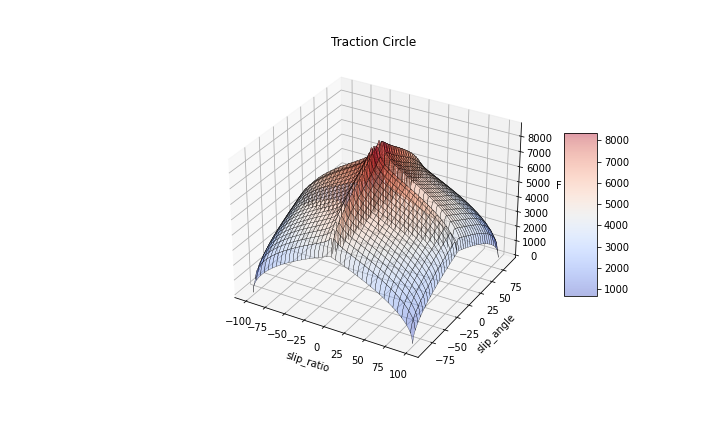

In [459]:
def combinedPacejka(slip_ratio, slip_angle, W):
    Flon = pacejkaMF(slip_ratio, B, C, D, E) * W
    # Flat = pacejkaMF(slip_angle, B, C, W * D, E)
    Flat = pacejkaMF(slip_angle, Blat, Clat, Dlat, Elat) * W

    accel = min(abs(slip_ratio) / 100.0, 1.0)
    corner = min(abs(slip_angle) / 90.0, 1.0)

    faccel = sqrt(1.0 - corner)
    fcorner = sqrt(1.0 - accel)

    # print("%.2f %.2f" % (accel, corner))
    
    # len = max(abs(Flon), abs(Flat))
    len = abs(Flon * faccel) + abs(Flat * fcorner)
    # len = W-sqrt(Flon*Flon + Flat*Flat)

    return len
    # if len <= 0.0:
    #     return abs(Flon) + abs(Flat)
    
    # len = sqrt(len)
    # return sqrt(abs(Flon)/len) * W + sqrt(abs(Flat)/len) * W

combined = np.vectorize(combinedPacejka)

x = np.linspace(-100.0, 100.0, 151)
y = np.linspace(-90.0, 90.0, 151)
# y = np.linspace(4500, 1500, 100)
X, Y = np.meshgrid(x, y)
Z = combined(X, Y, W) #(X/100.0) ** 2 + (Y/90.0) ** 2
# Z = pacejkaFV(X, B, C, D * Y, E)

fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(10, 6))
ax.set_title('Traction Circle')
ax.set_xlabel('slip_ratio')
ax.set_ylabel('slip_angle')
# ax.invert_yaxis()
ax.set_zlabel('F')
surf = ax.plot_surface(X, Y, Z, cmap='coolwarm', edgecolor='k', linewidth=0.25, alpha=0.4)
# surf = ax.plot_wireframe(X, Y, Z, cmap='coolwarm')
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
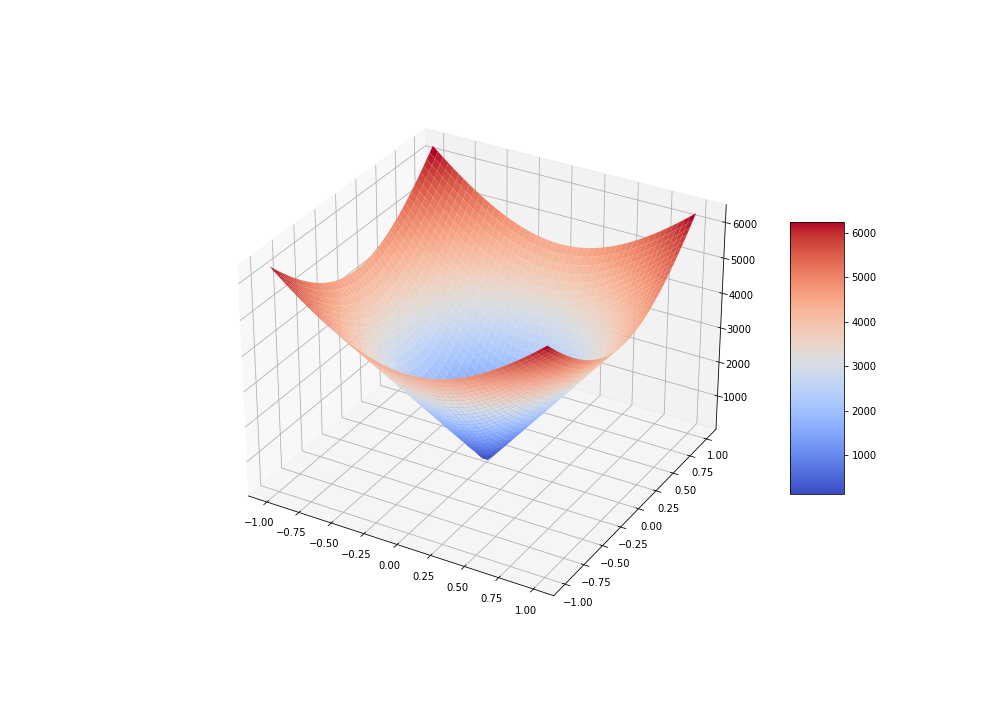

In [460]:
def calcTraction(flon, flat, W, TLimit=4000):
    return W * sqrt(max(0.0, flon**2 + flat**2))

vCalcTraction = np.vectorize(calcTraction)

x = np.linspace(-1, 1, 50)
y = np.linspace(-1, 1, 50)
X, Y=  np.meshgrid(x, y)
Z = vCalcTraction(X, Y, W) #np.sqrt(1.0 - (X**2 + Y**2)) #np.sqrt(X ** 2 + Y ** 2)

fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(14,10))

surf = ax.plot_surface(X, Y, Z, cmap='coolwarm')

fig.colorbar(surf, aspect=5, shrink=0.5)

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
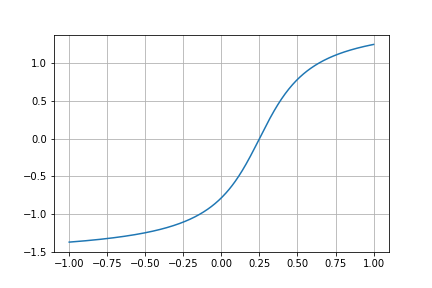

In [461]:
x = np.linspace(-1, 1, 500)

y = np.arctan((x - .25) * 4)

fig = plt.figure()

ax = plt.plot(x, y)
plt.grid()

plt.show()